In [1]:
df=read.csv("insurance.csv")

In [2]:
nrow(df);ncol(df)

[1] 1338

[1] 7

In [3]:
head(df)

age,sex,bmi,children,smoker,region,expenses
19,female,27.9,0,yes,southwest,16884.92
18,male,33.8,1,no,southeast,1725.55
28,male,33.0,3,no,southeast,4449.46
33,male,22.7,0,no,northwest,21984.47
32,male,28.9,0,no,northwest,3866.86
31,female,25.7,0,no,southeast,3756.62


In [4]:
library(caret)  #Classification And REgression Training


Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [5]:
data=read.csv('Insurancefinal .csv')

In [6]:
head(data)

Age,Sex,BMI,Children,Smoker,Region,Expenses,SE,NW,NE
19,0,27.9,0,1,0,16884.92,0,0,0
18,1,33.8,1,0,1,1725.55,1,0,0
28,1,33.0,3,0,1,4449.46,1,0,0
33,1,22.7,0,0,2,21984.47,0,1,0
32,1,28.9,0,0,2,3866.86,0,1,0
31,0,25.7,0,0,1,3756.62,1,0,0


In [7]:
#install.packages('dplyr')

In [8]:
library('dplyr')

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [9]:
finald_dt=select(data, -6)

In [10]:
head(finald_dt)

Age,Sex,BMI,Children,Smoker,Expenses,SE,NW,NE
19,0,27.9,0,1,16884.92,0,0,0
18,1,33.8,1,0,1725.55,1,0,0
28,1,33.0,3,0,4449.46,1,0,0
33,1,22.7,0,0,21984.47,0,1,0
32,1,28.9,0,0,3866.86,0,1,0
31,0,25.7,0,0,3756.62,1,0,0


In [11]:
sum(is.na(finald_dt))  # there is no any missing values.


[1] 0

In [12]:
#install.packages("ggplot2")

In [13]:
library("ggplot2")

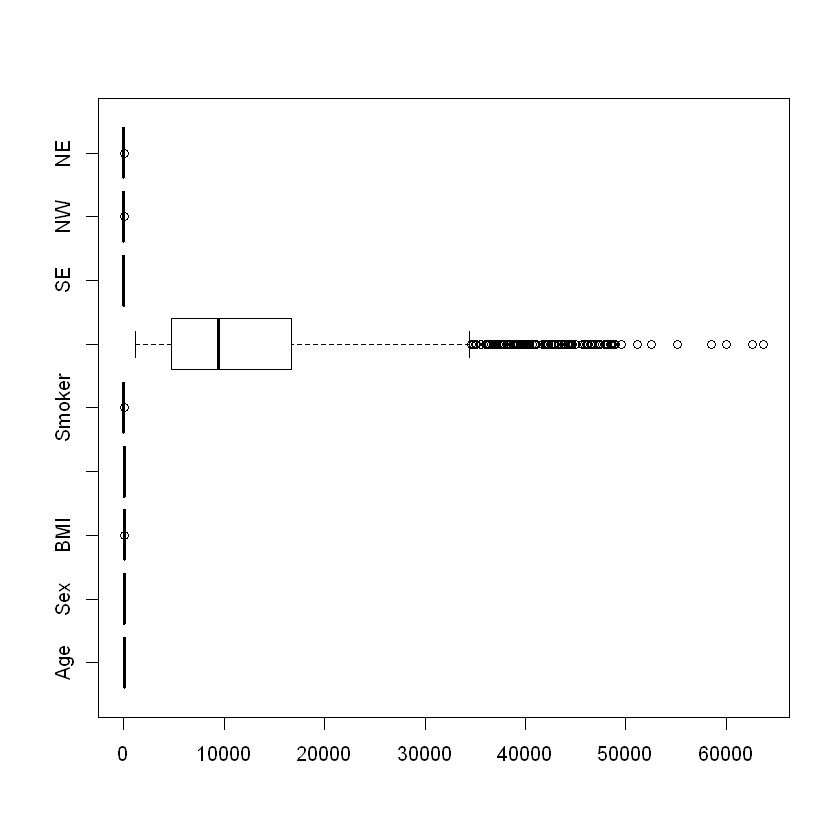

In [14]:
boxplot(finald_dt,horizontal =TRUE)

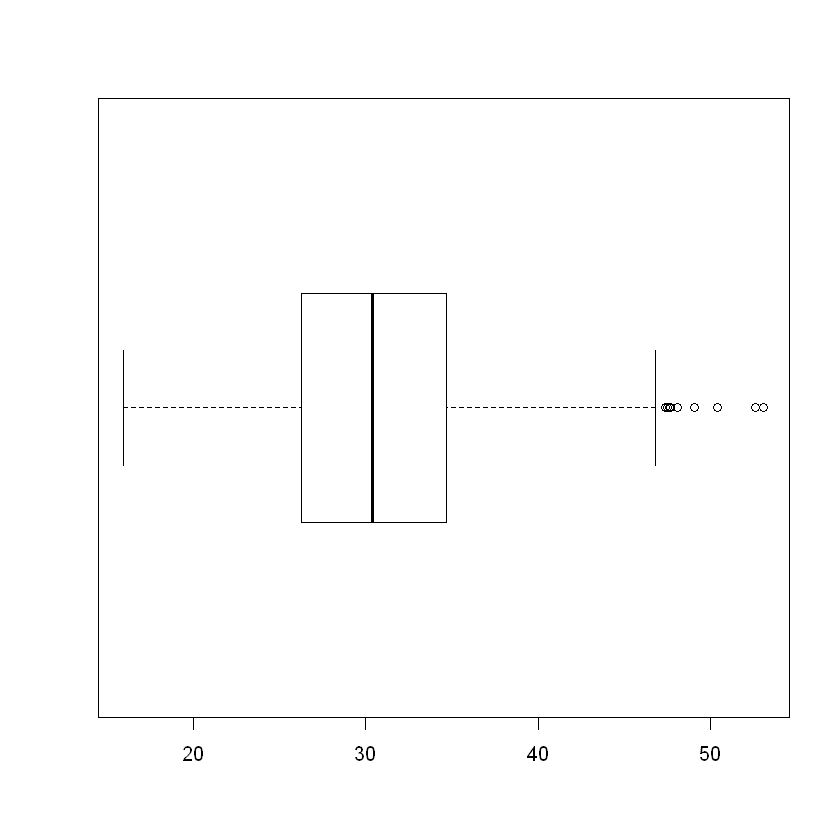

In [15]:
boxplot(finald_dt$BMI,horizontal =TRUE)

we can see outliers are there in BMI

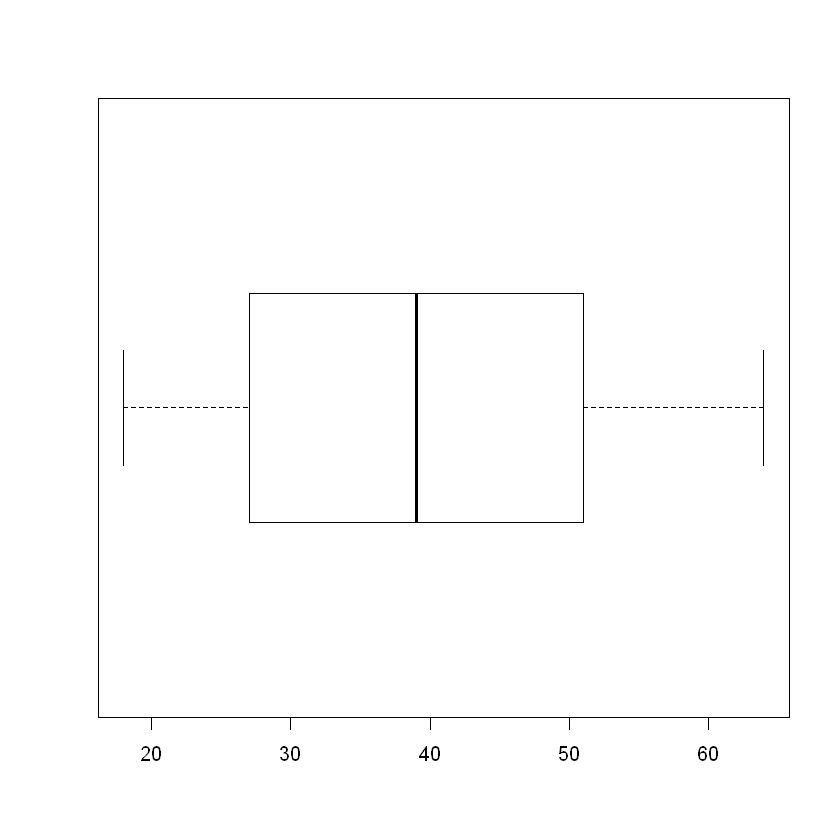

In [16]:

boxplot(finald_dt$Age,horizontal =TRUE)


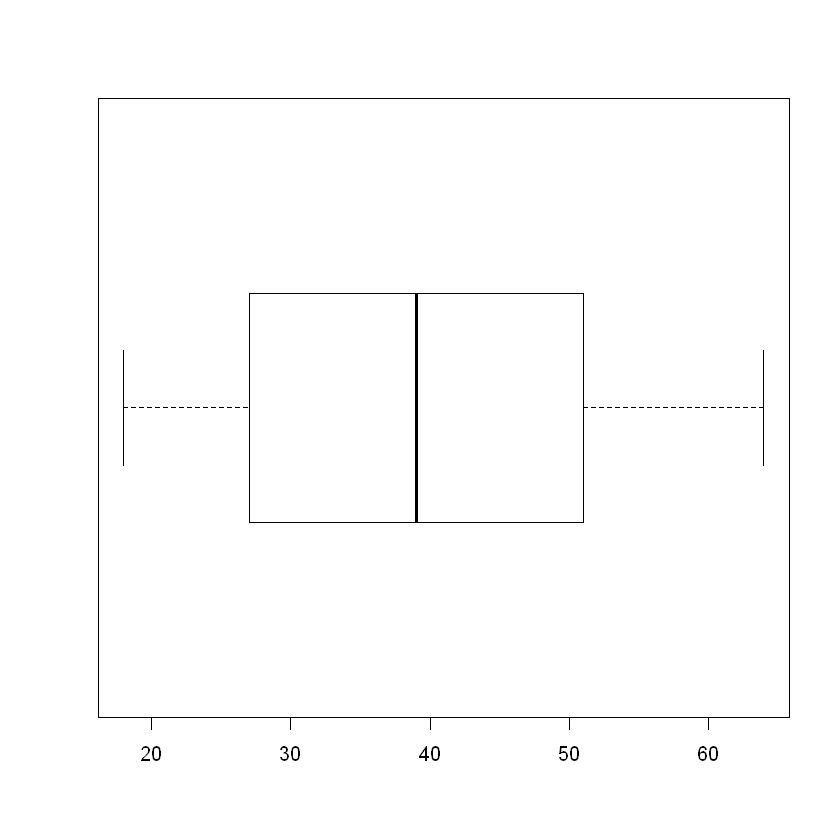

In [17]:
boxplot(finald_dt$Age,horizontal =TRUE)

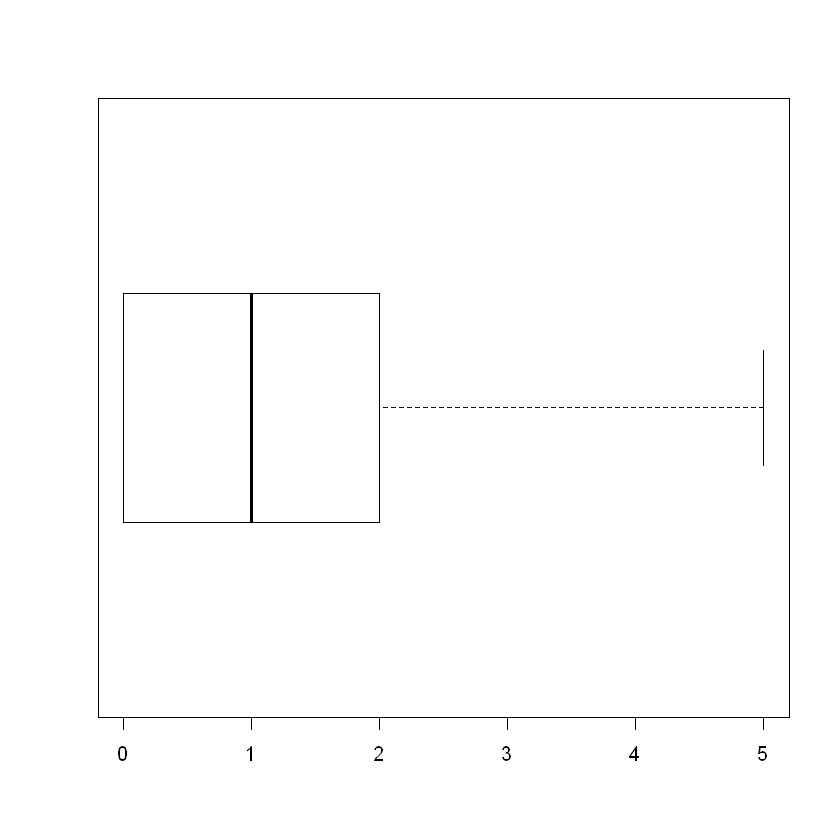

In [18]:
boxplot(finald_dt$Children,horizontal =TRUE)

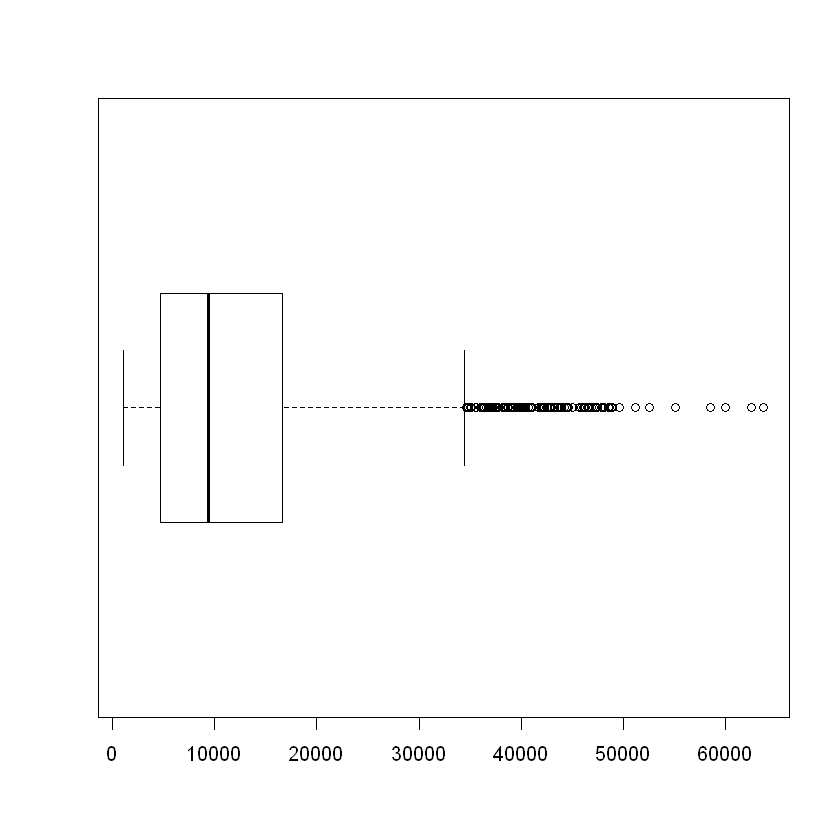

In [19]:
boxplot(finald_dt$Expenses,horizontal =TRUE)

There are outliers in Expenses

# Dealing With Outliers

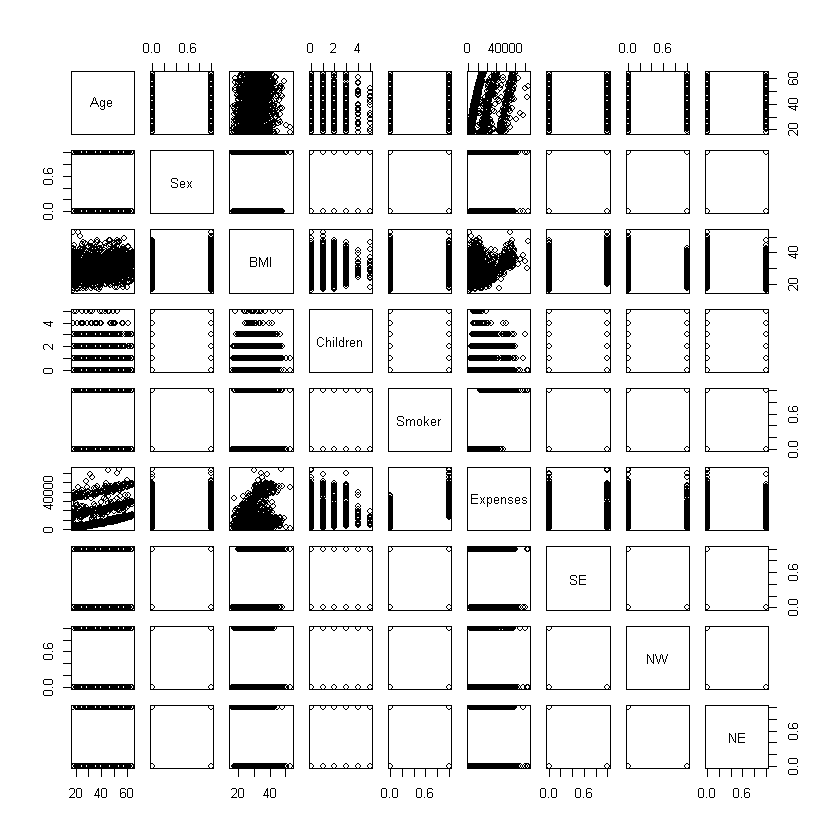

In [20]:
plot(finald_dt)

In [21]:
#install.packages('car')
library("car")

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



Warning message in plot.window(...):
""smoother" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""smoother" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""smoother" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""smoother" is not a graphical parameter"Warning message in box(...):
""smoother" is not a graphical parameter"Warning message in title(...):
""smoother" is not a graphical parameter"

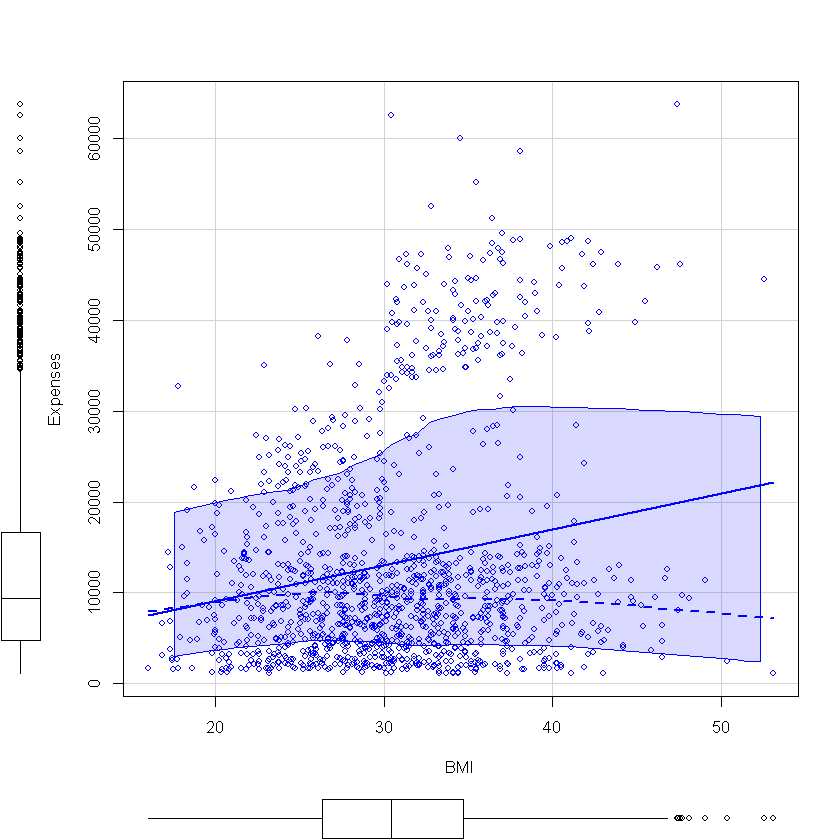

In [22]:
# Suppress the smoother and frame
scatterplot(Expenses ~BMI , data = finald_dt, smoother = TRUE)

In [23]:
install.packages("olsrr")

package 'olsrr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hp\AppData\Local\Temp\Rtmps5MNdx\downloaded_packages


In [24]:
y<-finald_dt$Expenses
x1<-finald_dt$Age 
x2<-finald_dt$Sex
x3<-finald_dt$BMI
x4<-finald_dt$Children
x5<-finald_dt$Smoker
x6<-finald_dt$SE
x7<-finald_dt$NW
x8<-finald_dt$NE

In [25]:
Initial<-lm(y~x1+x2+x3+x4+x5+x6+x7+x8,data=finald_dt)

In [26]:
summary(Initial)



Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8, data = finald_dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-11302.7  -2850.9   -979.6   1383.9  29981.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12900.87    1020.90 -12.637  < 2e-16 ***
x1             256.84      11.90  21.586  < 2e-16 ***
x2            -131.35     332.94  -0.395 0.693255    
x3             339.29      28.60  11.864  < 2e-16 ***
x4             475.69     137.80   3.452 0.000574 ***
x5           23847.48     413.14  57.723  < 2e-16 ***
x6             -76.29     470.64  -0.162 0.871253    
x7             606.52     477.18   1.271 0.203940    
x8             959.31     477.91   2.007 0.044921 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.9 on 8 and 1329 DF,  p-value: < 2.2e-16


In [27]:
anova(Initial)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x1,1,17530192069,17530192069,4.770535e+02,1.297588e-90
x2,1,791665676,791665676,2.154379e+01,3.800324e-06
x3,1,5271576186,5271576186,1.434567e+02,1.823347e-31
x4,1,551481511,551481511,1.500760e+01,1.122929e-04
x5,1,122859348738,122859348738,3.343402e+03,0.000000e+00
x6,1,82015298,82015298,2.231903e+00,1.354247e-01
x7,1,3374986,3374986,9.184434e-02,7.618929e-01
x8,1,148060075,148060075,4.029196e+00,4.492142e-02
Residuals,1329,48836507128,36746807,NA,NA


In [28]:
## Forming Correlation matrix

x<- cbind(x1,x2,x3,x4,x5,x6,x7,x8)
frame <- data.frame(x1,x2,x3,x4,x5,x6,x7,x8)
frame

x1,x2,x3,x4,x5,x6,x7,x8
19,0,27.9,0,1,0,0,0
18,1,33.8,1,0,1,0,0
28,1,33.0,3,0,1,0,0
33,1,22.7,0,0,0,1,0
32,1,28.9,0,0,0,1,0
31,0,25.7,0,0,1,0,0
46,0,33.4,1,0,1,0,0
37,0,27.7,3,0,0,1,0
37,1,29.8,2,0,0,0,1
60,0,25.8,0,0,0,1,0


In [29]:
xx=cor(frame)
xx #cor matrix

,x1,x2,x3,x4,x5,x6,x7,x8
x1,1.0000000000,-0.020855872,0.109341015,0.04246900,-0.025018752,-0.01164194,-0.0004074234,0.002474955
x2,-0.0208558722,1.000000000,0.046380206,0.01716298,0.076184817,0.01711688,-0.0111557280,-0.002425432
x3,0.1093410146,0.046380206,1.000000000,0.01264471,0.003968054,0.27014413,-0.1359923260,-0.138090834
x4,0.0424689986,0.017162978,0.012644707,1.00000000,0.007673120,-0.02306575,0.0248061293,-0.022807598
x5,-0.0250187515,0.076184817,0.003968054,0.00767312,1.000000000,0.06849841,-0.0369454740,0.002811135
x6,-0.0116419406,0.017116875,0.270144127,-0.02306575,0.068498410,1.00000000,-0.3462646614,-0.345561015
x7,-0.0004074234,-0.011155728,-0.135992326,0.02480613,-0.036945474,-0.34626466,1.0000000000,-0.320177261
x8,0.0024749545,-0.002425432,-0.138090834,-0.02280760,0.002811135,-0.34556102,-0.3201772613,1.000000000



  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.90             FALSE



installing the source package 'corrplot'

corrplot 0.90 loaded


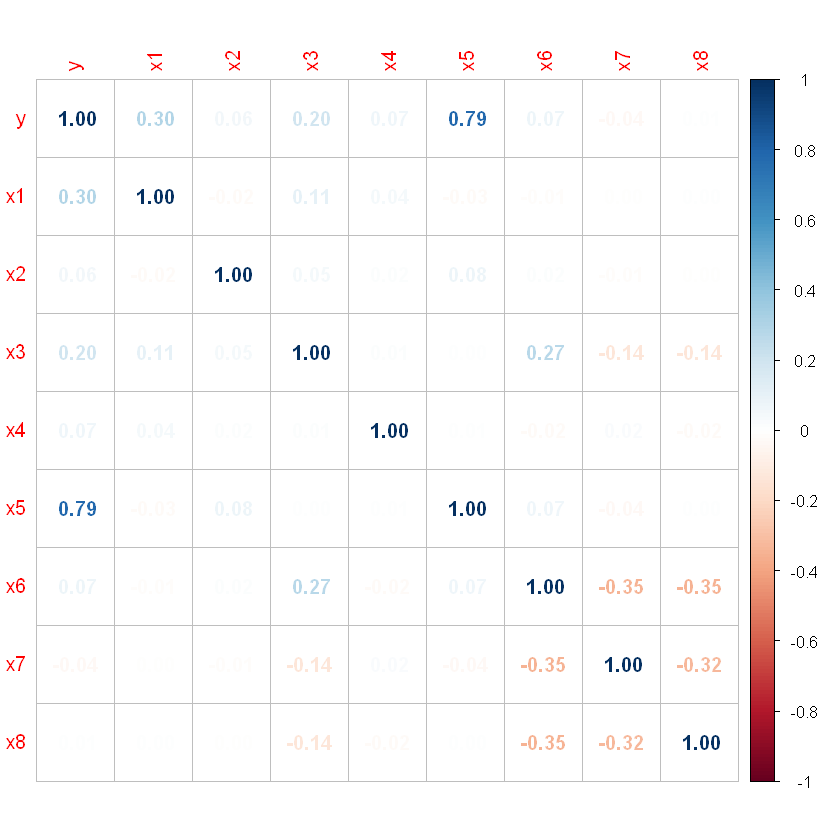

In [30]:
install.packages("corrplot")
library("corrplot")
## checking correlation between regressors variables and response variable 
corrplot(cor(cbind(y,frame)),method="number")

In [31]:
## installing car package for VIF 
#install.packages("car") 
library(car)
## checking VIF 
vif(Initial)

x1       x2       x3       x4       x5       x6       x7       x8 
1.016843 1.008900 1.106682 1.004008 1.012067 1.597204 1.524717 1.526170

In [32]:
## installing mctest package for variance decomposition proportion
install.packages("mctest")
library(mctest)
eigprop(Initial)
#since maximum condition index is 17.4427 which is > 15 but there are no such 
#corresponding subset of regressors which are > 0.5
#hence our model is free from multicollinearity

package 'mctest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hp\AppData\Local\Temp\Rtmps5MNdx\downloaded_packages


Warning message:
"package 'mctest' was built under R version 3.6.3"


Call:
eigprop(mod = Initial)

  Eigenvalues      CI (Intercept)     x1     x2     x3     x4     x5     x6
1      5.0021  1.0000      0.0010 0.0040 0.0118 0.0013 0.0119 0.0090 0.0055
2      1.0143  2.2207      0.0000 0.0001 0.0000 0.0000 0.0036 0.0292 0.2138
3      1.0006  2.2358      0.0000 0.0000 0.0000 0.0000 0.0002 0.0000 0.0520
4      0.7491  2.5840      0.0003 0.0018 0.0003 0.0005 0.0222 0.9327 0.0230
5      0.5153  3.1156      0.0002 0.0006 0.2416 0.0003 0.7421 0.0231 0.0026
6      0.4295  3.4127      0.0019 0.0135 0.7009 0.0026 0.1771 0.0000 0.0470
7      0.1999  5.0020      0.0053 0.1205 0.0185 0.0107 0.0330 0.0002 0.5727
8      0.0727  8.2938      0.0506 0.8217 0.0233 0.1412 0.0052 0.0025 0.0835
9      0.0164 17.4427      0.9408 0.0378 0.0034 0.8434 0.0047 0.0032 0.0000
      x7     x8
1 0.0049 0.0049
2 0.2296 0.0042
3 0.1002 0.3389
4 0.0070 0.0008
5 0.0114 0.0032
6 0.0537 0.0472
7 0.5074 0.5155
8 0.0330 0.0320
9 0.0528 0.0533

Row 8==> x1, proportion 0.821708 >= 0.50 
Row 6=

In [33]:
## Checking skewness of regressors 
install.packages("moments")
library(moments)
skewness(x1) 
skewness(x2)
skewness(x3)
skewness(x4)
skewness(x5)
skewness(x6)
skewness(x7)
skewness(x8)
##values of skewness fall between ??? 3 and + 3
# of all regressor which is indication of acceptable skewness
#hence we need not to check outliers 

package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hp\AppData\Local\Temp\Rtmps5MNdx\downloaded_packages


[1] 0.05561008

[1] -0.0209279

[1] 0.2842738

[1] 0.9373281

[1] 1.463124

[1] 1.024471

[1] 1.199063

[1] 1.203809

In [34]:
## Graphs for checking heteroscedasticity 
install.packages("lmtest")
library(lmtest)
res <- residuals(Initial) 


package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hp\AppData\Local\Temp\Rtmps5MNdx\downloaded_packages


Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



[1] 8.06233e-18

[1] 2.32788e-13

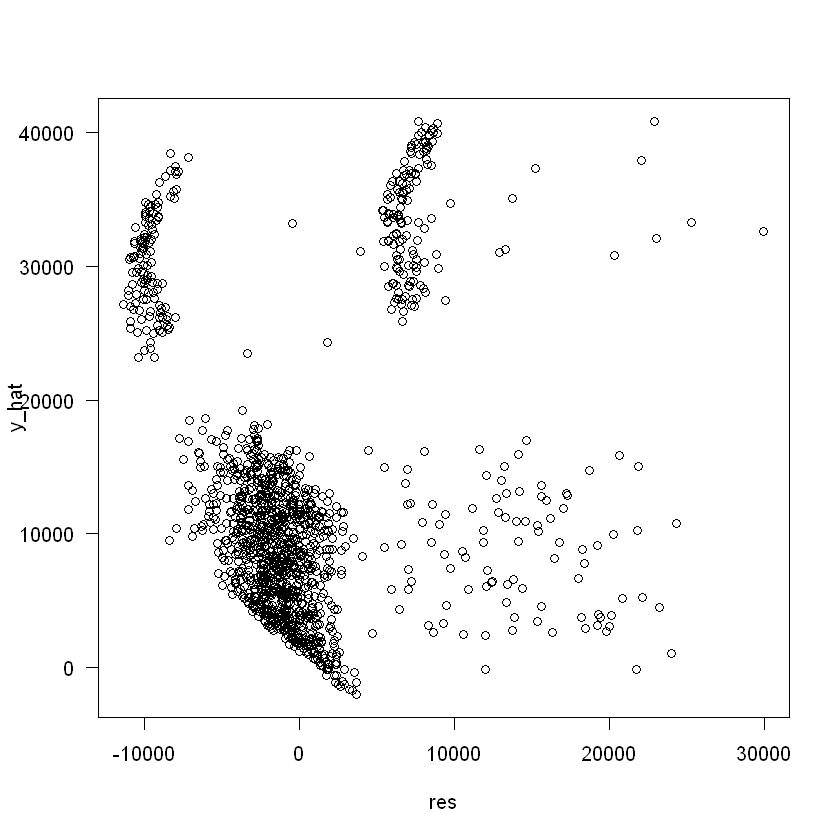

In [35]:
y_hat <- fitted(Initial)
cor(y_hat,res) # cor()= 0.0000000000000000846319= 8.46319e-17 almost zero (approx.)
               # Hence, our assumption on homoscedastic error holds true.
plot(res,y_hat,las=1)
mean(res)

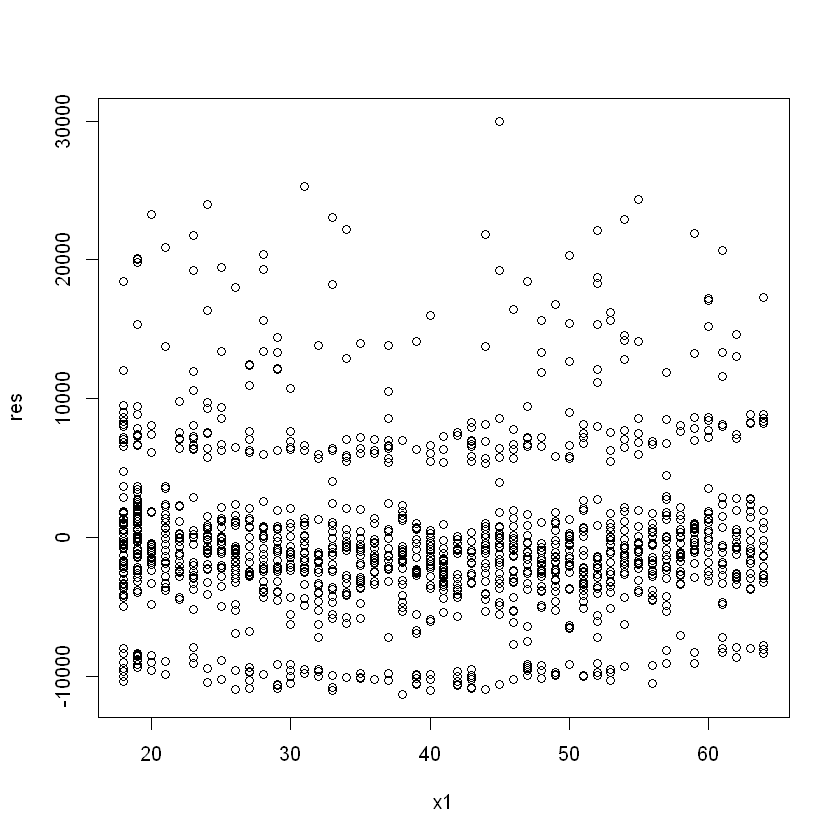

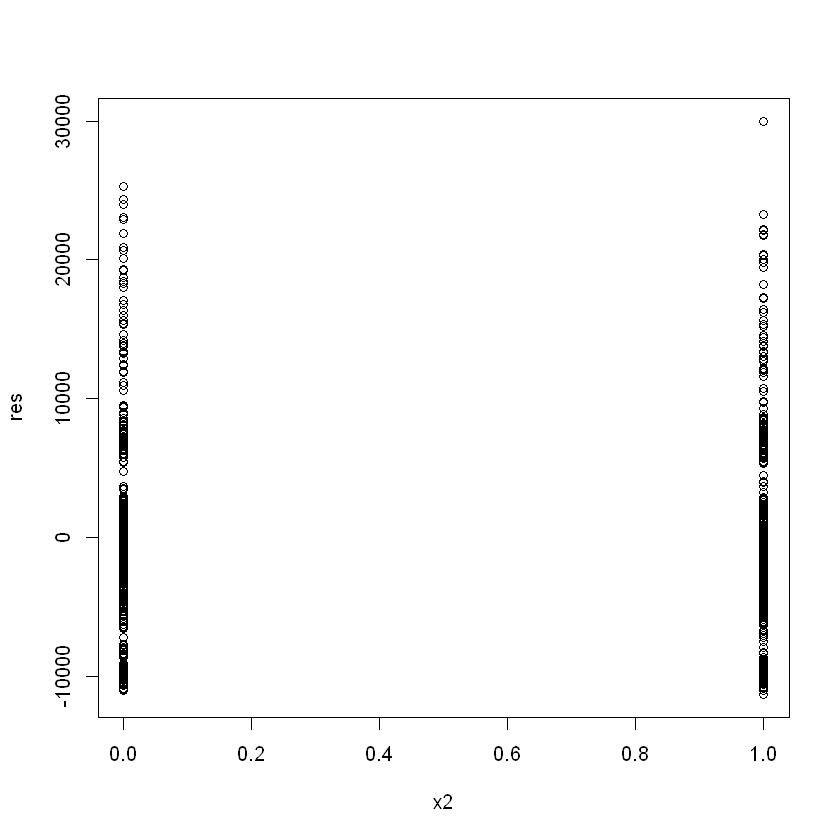

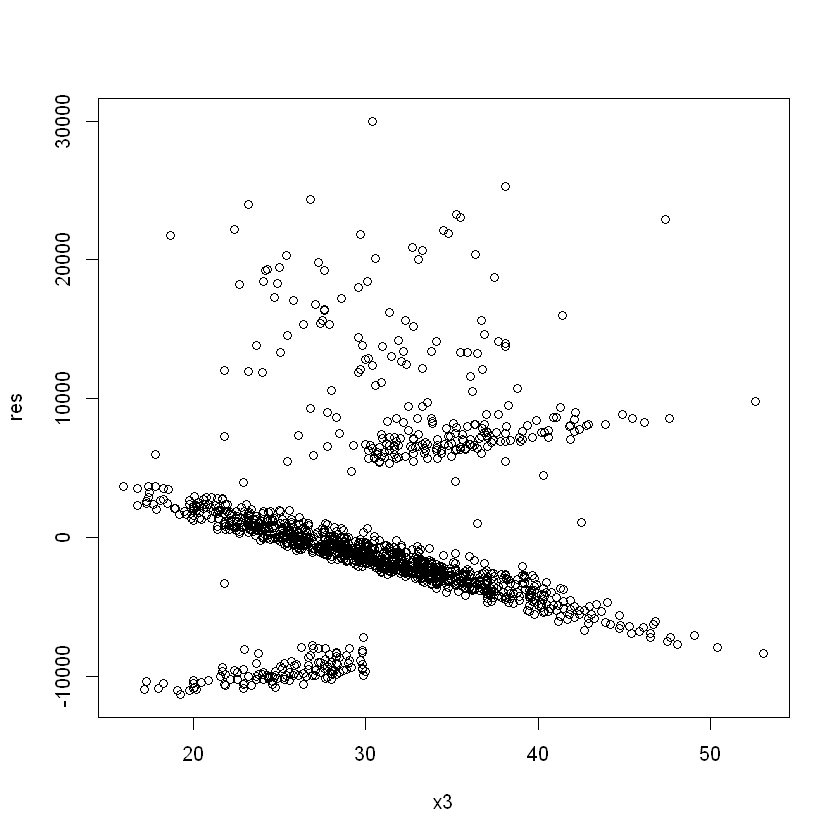

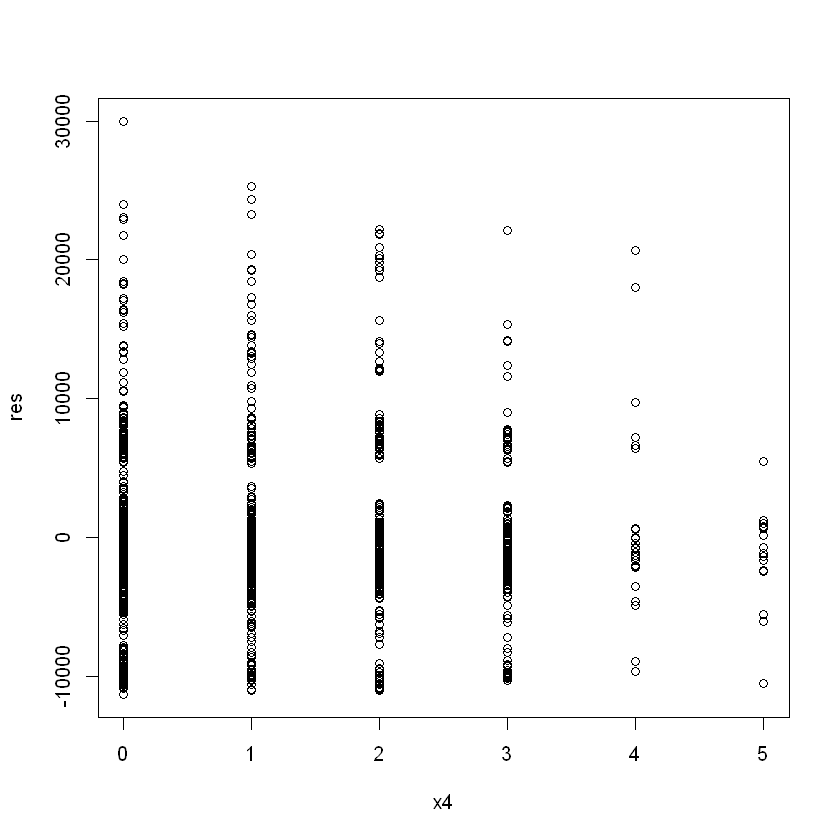

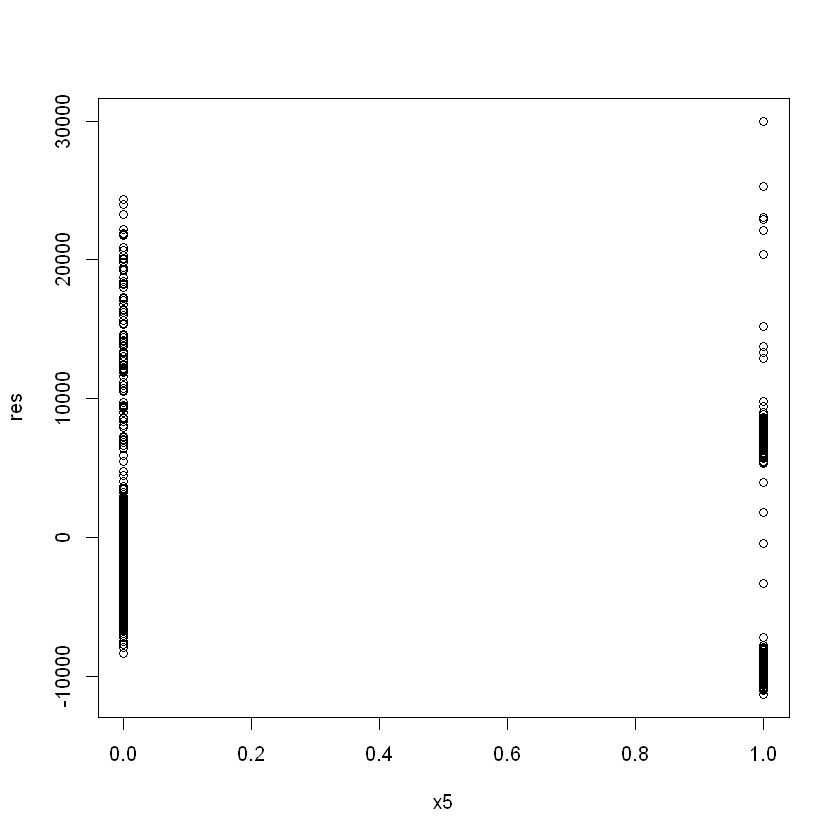

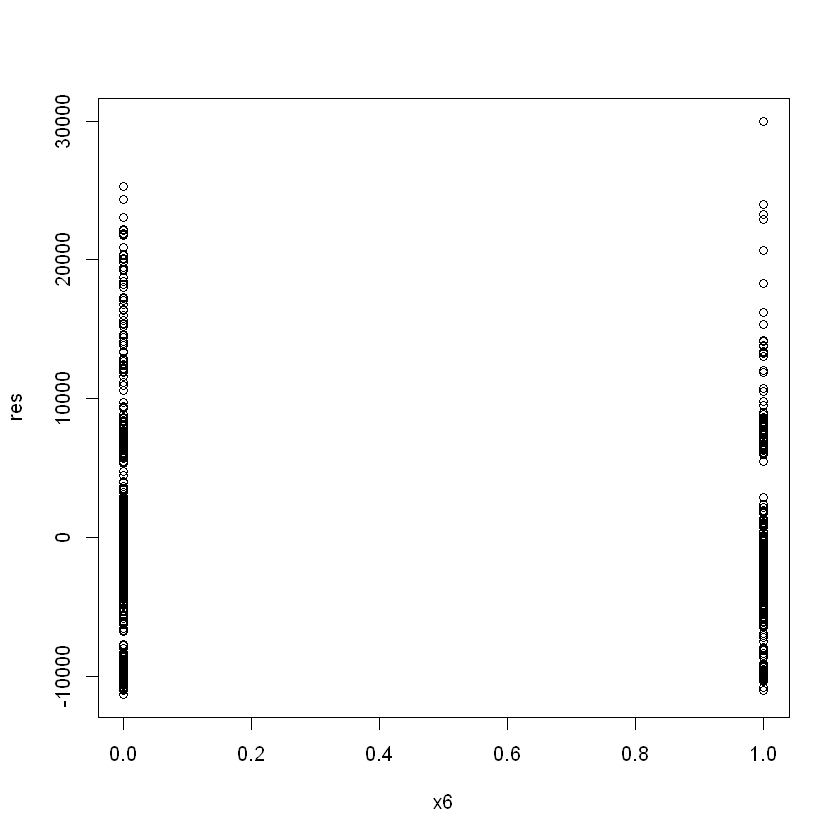

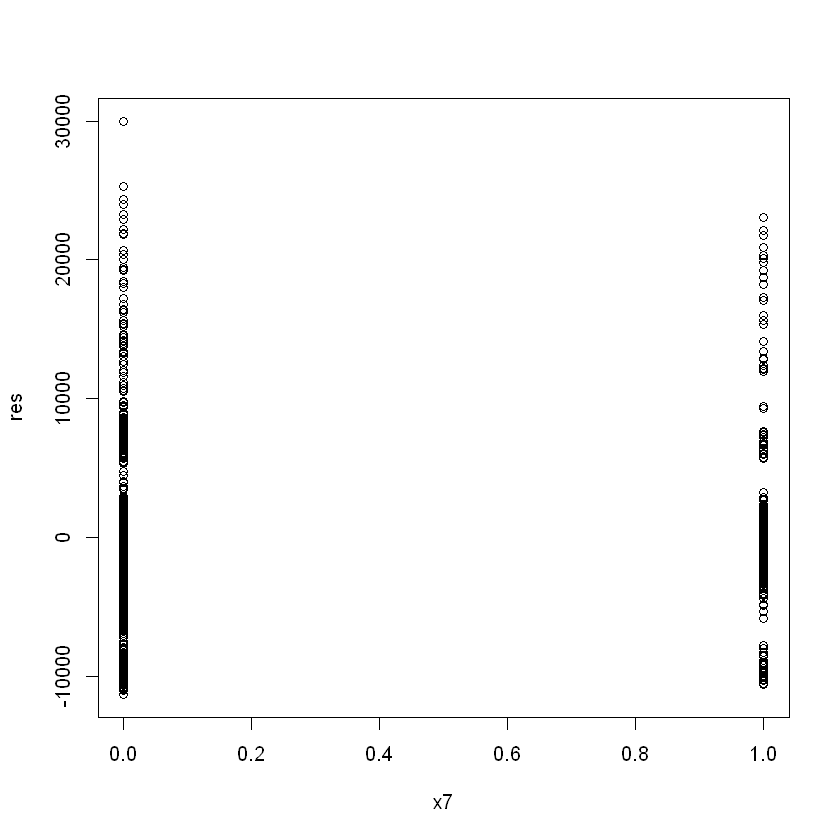

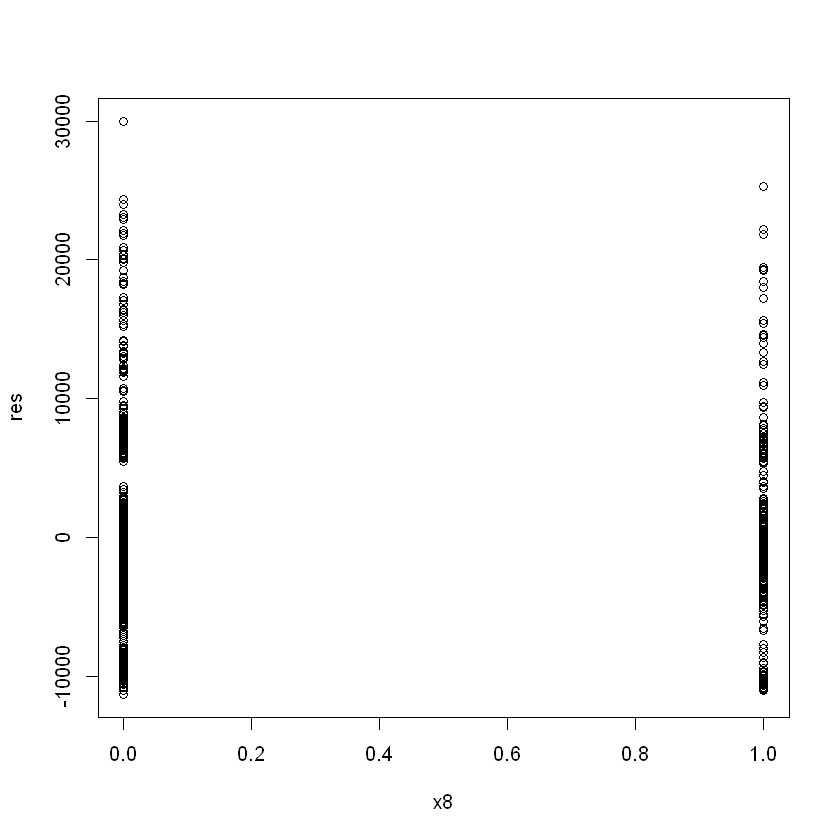

In [36]:
#res vs predictors graph of residuals against independent variables 
plot(x1,res,las=0)
plot(x2,res,las=0)
plot(x3,res)#The plot is close to a outward opening funnel
plot(x4,res,las=0)
plot(x5,res,las=0)
plot(x6,res,las=0)
plot(x7,res,las=0)
plot(x8,res,las=0)

#which suggests the following relationship:
#Var(ei) ??? ??2BMIi
#To ensure our usual error assumptions, we need to account for this and make changes to our model.
#The way we can accomodate such a relationship is by dividing the model on both sides by the BMI
#regressor. So, our new model is 

In [38]:
#Breusch-Pagan Test for heteroscedasticity 
bptest(Initial)


	studentized Breusch-Pagan test

data:  Initial
BP = 121.59, df = 8, p-value < 2.2e-16


In [39]:
fitt<-lm(y~x1+x2+x3+x4+x5+x6+x7+x8)# model before applying weight=1/[BMI(j)] 
summary(fitt)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8)

Residuals:
     Min       1Q   Median       3Q      Max 
-11302.7  -2850.9   -979.6   1383.9  29981.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12900.87    1020.90 -12.637  < 2e-16 ***
x1             256.84      11.90  21.586  < 2e-16 ***
x2            -131.35     332.94  -0.395 0.693255    
x3             339.29      28.60  11.864  < 2e-16 ***
x4             475.69     137.80   3.452 0.000574 ***
x5           23847.48     413.14  57.723  < 2e-16 ***
x6             -76.29     470.64  -0.162 0.871253    
x7             606.52     477.18   1.271 0.203940    
x8             959.31     477.91   2.007 0.044921 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.9 on 8 and 1329 DF,  p-value: < 2.2e-16


In [40]:
#model after applying weights
fitt11<- lm(y~x1 + x2 + x3 + x4 + x5+x6+x7+x8,weights=1/x3)
summary(fitt11)
bptest(fitt11)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8, weights = 1/x3)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-2243.0  -552.6  -249.4   215.7  5684.3 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12650.31     987.28 -12.813  < 2e-16 ***
x1             254.65      11.85  21.498  < 2e-16 ***
x2             -42.33     329.62  -0.128  0.89783    
x3             347.37      28.63  12.131  < 2e-16 ***
x4             430.07     136.41   3.153  0.00165 ** 
x5           21986.30     408.99  53.757  < 2e-16 ***
x6             -61.07     475.34  -0.128  0.89780    
x7             608.71     468.12   1.300  0.19372    
x8             830.90     468.28   1.774  0.07623 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1107 on 1329 degrees of freedom
Multiple R-squared:  0.7292,	Adjusted R-squared:  0.7275 
F-statistic: 447.2 on 8 and 1329 DF,  p-value: < 2.2e-16



	studentized Breusch-Pagan test

data:  fitt11
BP = 121.59, df = 8, p-value < 2.2e-16


In [41]:
#log transformation in expenses
fitt2<-lm(log(y)~x1+x2+x3+x4+x5+x6+x7+x8)
summary(fitt2)
bptest(fitt2)


Call:
lm(formula = log(y) ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.07125 -0.19783 -0.04891  0.06604  2.16655 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.9018812  0.0748241  92.241  < 2e-16 ***
x1           0.0345816  0.0008721  39.654  < 2e-16 ***
x2          -0.0754109  0.0244017  -3.090 0.002040 ** 
x3           0.0133658  0.0020960   6.377 2.49e-10 ***
x4           0.1018651  0.0100997  10.086  < 2e-16 ***
x5           1.5542783  0.0302800  51.330  < 2e-16 ***
x6          -0.0282606  0.0344943  -0.819 0.412772    
x7           0.0651242  0.0349740   1.862 0.062813 .  
x8           0.1289048  0.0350274   3.680 0.000242 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4443 on 1329 degrees of freedom
Multiple R-squared:  0.7679,	Adjusted R-squared:  0.7665 
F-statistic: 549.7 on 8 and 1329 DF,  p-value: < 2.2e-16



	studentized Breusch-Pagan test

data:  fitt2
BP = 77.071, df = 8, p-value = 1.897e-13



Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



[1] 0.1414141

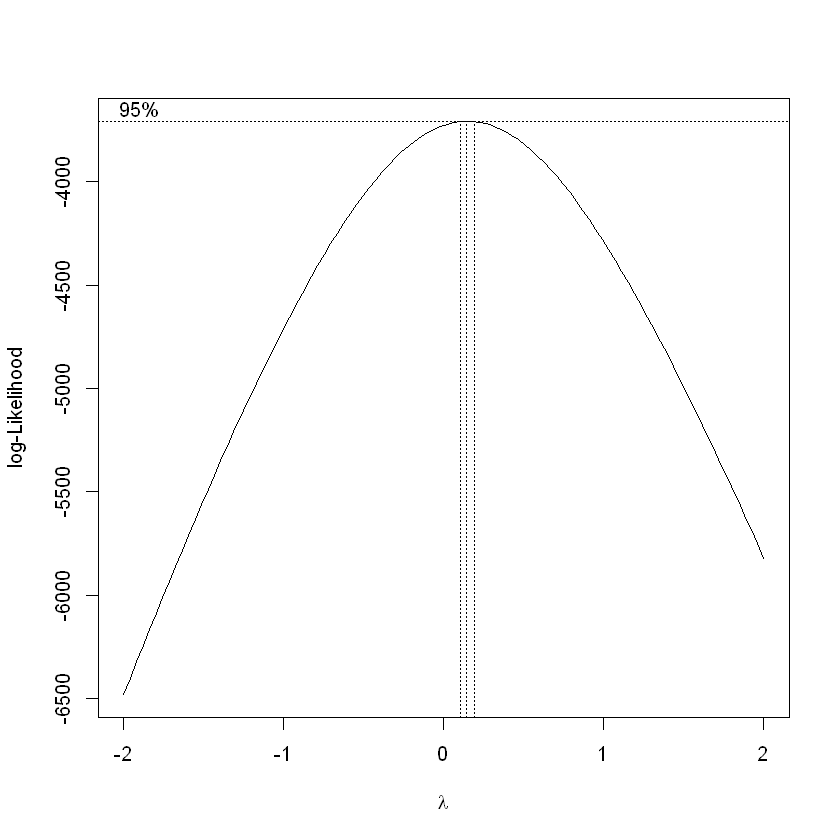

In [42]:
# box-cox transformation
library(MASS)
bc=boxcox(fitt)
(lambda=bc$x[which.max(bc$y)])

In [43]:
#lamda=0.1414141
fitt3=lm(((y^lambda-1)/lambda)~x1+x2+x3+x4+x5+x5+x7+x8)

In [44]:
library(lmtest)
residual_<- residuals(fitt3) 
y_hat_new<- fitted(fitt3)
cor(y_hat_new,residual_)
summary(fitt3)

[1] 4.466165e-17


Call:
lm(formula = ((y^lambda - 1)/lambda) ~ x1 + x2 + x3 + x4 + x5 + 
    x5 + x7 + x8)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4737 -0.7648 -0.2334  0.1854  7.7836 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.81127    0.26555  40.713  < 2e-16 ***
x1           0.11845    0.00311  38.084  < 2e-16 ***
x2          -0.23090    0.08707  -2.652   0.0081 ** 
x3           0.05421    0.00737   7.356 3.31e-13 ***
x4           0.32820    0.03602   9.112  < 2e-16 ***
x5           5.89236    0.10782  54.652  < 2e-16 ***
x7           0.26663    0.10883   2.450   0.0144 *  
x8           0.48193    0.10889   4.426 1.04e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.585 on 1330 degrees of freedom
Multiple R-squared:  0.7761,	Adjusted R-squared:  0.7749 
F-statistic: 658.6 on 7 and 1330 DF,  p-value: < 2.2e-16


In [45]:
bptest(fitt3)
shapiro.test(residual_)


	studentized Breusch-Pagan test

data:  fitt3
BP = 54.061, df = 7, p-value = 2.287e-09



	Shapiro-Wilk normality test

data:  residual_
W = 0.81548, p-value < 2.2e-16


In [46]:
#variable selection
library(MASS)
step(fitt,direction="both")
## Variable Selection	Akaike Information criteria corrected

Start:  AIC=23316.34
y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8

       Df  Sum of Sq        RSS   AIC
- x6    1 9.6556e+05 4.8837e+10 23314
- x2    1 5.7197e+06 4.8842e+10 23315
- x7    1 5.9365e+07 4.8896e+10 23316
<none>               4.8837e+10 23316
- x8    1 1.4806e+08 4.8985e+10 23318
- x4    1 4.3789e+08 4.9274e+10 23326
- x3    1 5.1723e+09 5.4009e+10 23449
- x1    1 1.7122e+10 6.5958e+10 23717
- x5    1 1.2244e+11 1.7127e+11 24993

Step:  AIC=23314.37
y ~ x1 + x2 + x3 + x4 + x5 + x7 + x8

       Df  Sum of Sq        RSS   AIC
- x2    1 5.7200e+06 4.8843e+10 23313
<none>               4.8837e+10 23314
- x7    1 8.8108e+07 4.8926e+10 23315
+ x6    1 9.6556e+05 4.8837e+10 23316
- x8    1 2.1080e+08 4.9048e+10 23318
- x4    1 4.3949e+08 4.9277e+10 23324
- x3    1 5.3016e+09 5.4139e+10 23450
- x1    1 1.7145e+10 6.5982e+10 23715
- x5    1 1.2290e+11 1.7174e+11 24995

Step:  AIC=23312.53
y ~ x1 + x3 + x4 + x5 + x7 + x8

       Df  Sum of Sq        RSS   AIC
<none>               4.88


Call:
lm(formula = y ~ x1 + x3 + x4 + x5 + x7 + x8)

Coefficients:
(Intercept)           x1           x3           x4           x5           x7  
   -12969.0        257.0        338.0        475.4      23830.9        644.5  
         x8  
      996.7  


In [56]:
#install.packages("AICcmodavg") 
#library(AICcmodavg)
#AICc(fitt)

## AICc=27115.59


In [50]:
#final model after variable selection
final_model=lm(formula = y ~ x1 + x3 + x4 + x5 + x7 + x8,data=finald_dt)
summary(final_model)
bptest(final_model)


Call:
lm(formula = y ~ x1 + x3 + x4 + x5 + x7 + x8, data = finald_dt)

Residuals:
   Min     1Q Median     3Q    Max 
-11331  -2833  -1001   1379  29891 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12969.02    1006.47 -12.886  < 2e-16 ***
x1             257.01      11.88  21.632  < 2e-16 ***
x3             337.97      28.13  12.014  < 2e-16 ***
x4             475.41     137.63   3.454 0.000569 ***
x5           23830.93     410.83  58.006  < 2e-16 ***
x7             644.48     415.85   1.550 0.121432    
x8             996.66     416.12   2.395 0.016751 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6058 on 1331 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7498 
F-statistic: 668.7 on 6 and 1331 DF,  p-value: < 2.2e-16



	studentized Breusch-Pagan test

data:  final_model
BP = 119.72, df = 6, p-value < 2.2e-16


In [51]:
##Calculation of MSE 
mean(fitt$residuals^2)


[1] 36499632

[1] 0.8665613

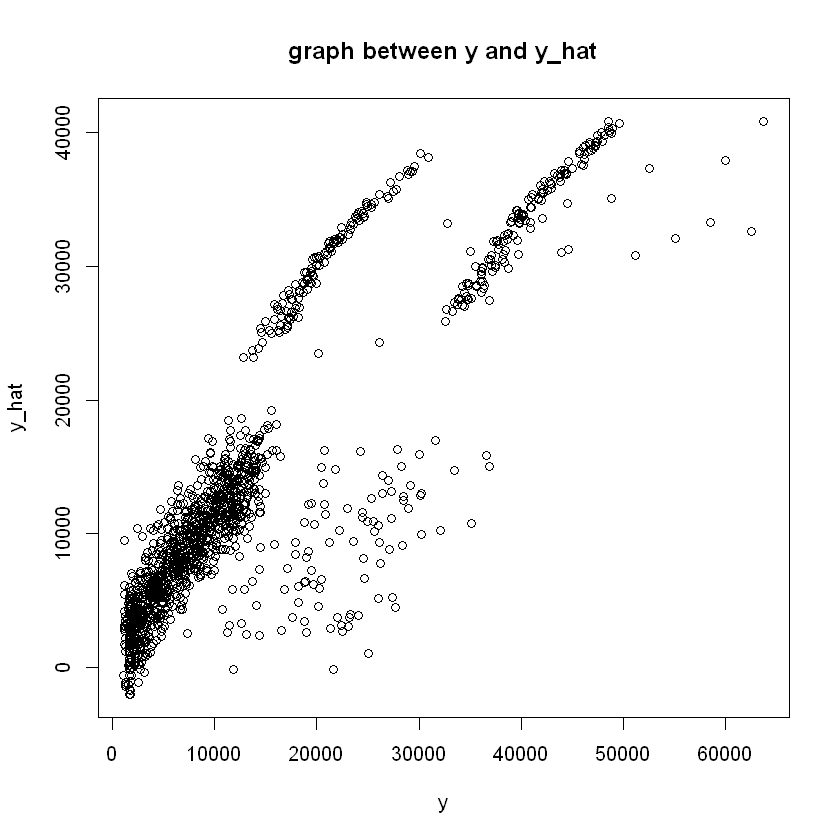

In [52]:
## prediction of data 
cor(y,y_hat) 
plot(y,y_hat, xlab="y", ylab="y_hat", main="graph between y and y_hat")
## Graph between observed and fitted values

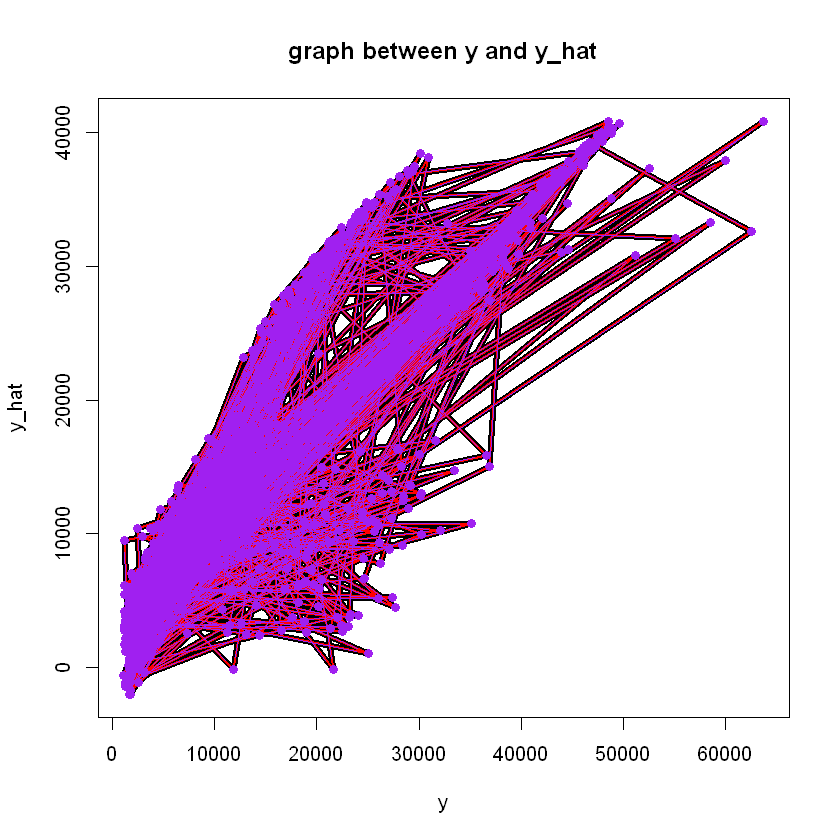

In [53]:
## Graph between observed and fitted values

plot(y,y_hat, type="l", lwd=5, xlab="y", ylab="y_hat", main="graph between y and y_hat")

lines(y, y_hat, col="red", lwd=2)

lines(y, y_hat, type="b", col="purple",pch=19)

In [54]:
#final model after variable selection 
#
final_model=lm(formula = y ~ x1 + x3 + x4 + x5 + x7 + x8,data=finald_dt)

library(lmtest)
residual<- residuals(final_model) 
y_hatfinal <- fitted(final_model)
cor(y_hatfinal,residual)


[1] 1.346206e-17

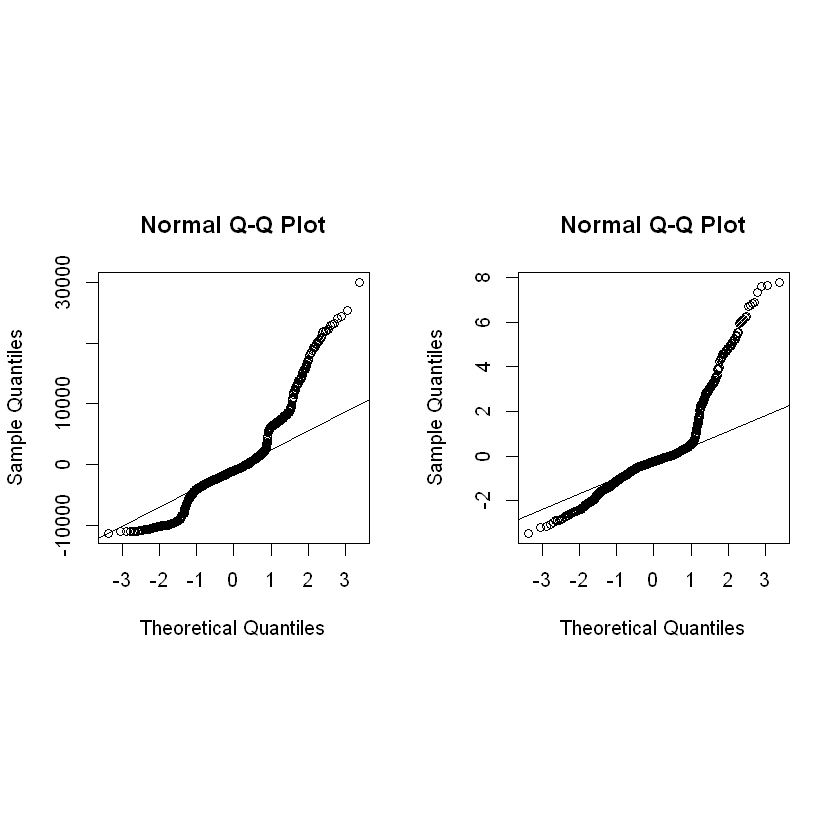

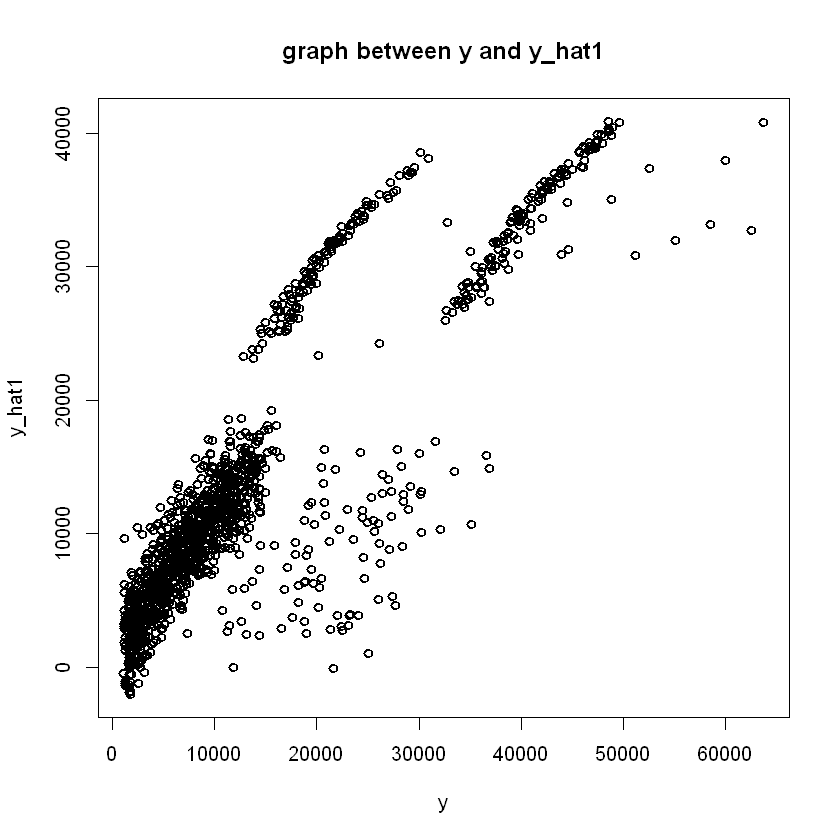

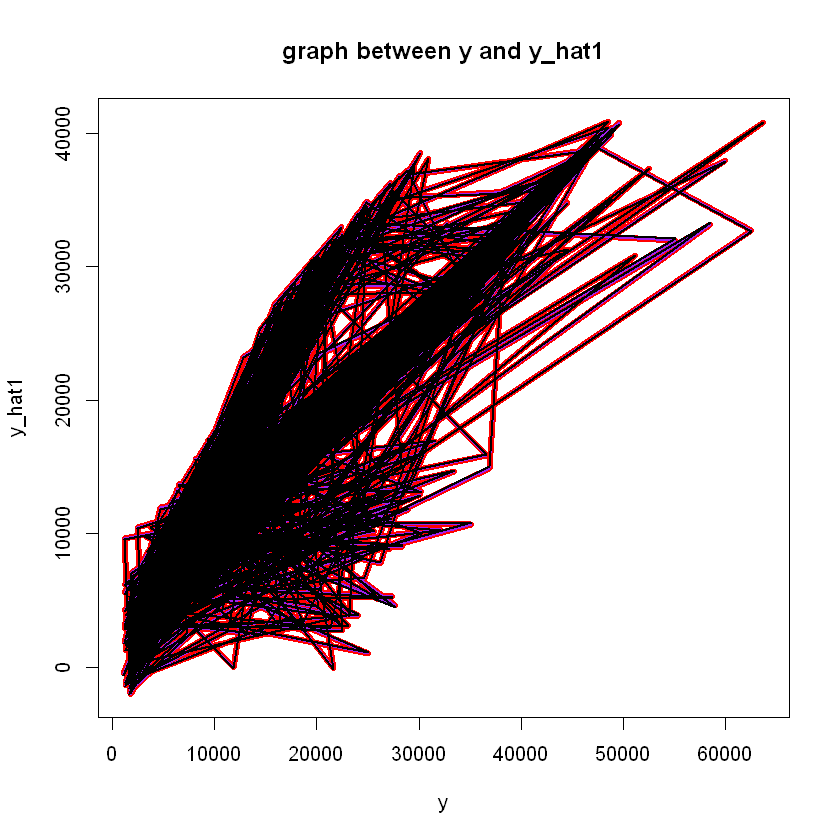

In [55]:

#define plotting area
op <- par(pty = "s", mfrow = c(1, 2))

#Q-Q plot for original model
qqnorm(fitt$residuals)
qqline(fitt$residuals)

#Q-Q plot for Box-Cox transformed model
qqnorm(fitt3$residuals)
qqline(fitt3$residuals)

#display both Q-Q plots
par(op)

y_hat1 <- fitted(final_model)
plot(y,y_hat1,lwd=2, xlab="y", ylab="y_hat1", main="graph between y and y_hat1")
## Graph between observed and fitted values

plot(y,y_hat1, type="l", col="red", lwd=5, xlab="y", ylab="y_hat1", main="graph between y and y_hat1")

lines(y, y_hat1, col="purple", lwd=2)

lines(y, y_hat, xlab="y", ylab="y_hat1", main="graph between y and y_hat1", lwd=2, pch=19)





# CONCLUSION:
after transformation data:  Residual standard error: 1.589 on 1331 degrees of freedom
#Multiple R-squared:  0.7749,	Adjusted R-squared:  0.7739 
#F-statistic: 763.7 on 6 and 1331 DF,  p-value: < 2.2e-16
#new_model
             
#BP = 55.176, df = 6, p-value = 4.271e-10    Shapiro-Wilk normality test
                                                          #data:  residual
                                                         #W = 0.89911, p-value < 2.2e-16